# Problem 3.3

**Integrated Energy Grids**

**Problem 3.3**

**Using the Python package [networkX](networkX), codify the network described in Problem 3.2** 

:::{note}
If you have not yet set up Python on your computer, you can execute this tutorial in your browser via [Google Colab](https://colab.research.google.com/). Click on the rocket in the top right corner and launch "Colab". If that doesn't work download the `.ipynb` file and import it in [Google Colab](https://colab.research.google.com/).

Then install the following packages by executing the following command in a Jupyter cell at the top of the notebook.

```sh
!pip install numpy networkx pandas matplotlib
```
:::

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

We start by creating the network and adding the nodes and links.

In [2]:
N = nx.Graph()
N.add_nodes_from([0, 1, 2, 3, 4])
N.add_edges_from([(0, 1), (1, 2), (1, 3), (1, 4), (2,4)])

**a) Make a plot of the network**

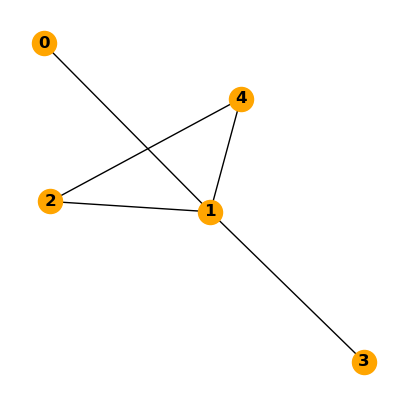

In [3]:
fig, ax = plt.subplots(figsize=(5, 5))
nx.draw(N, with_labels=True, ax=ax, node_color="orange", font_weight="bold")

We can add the position of every node to make the figure more similar to the original plot. 

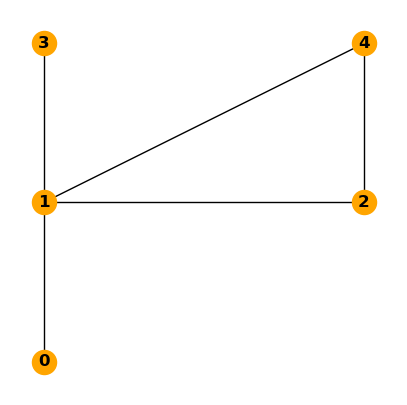

In [4]:
pos=nx.get_node_attributes(N,'pos')
pos[0] = np.array([0, 0])
pos[1] = np.array([0, 1])
pos[2] = np.array([1, 1])
pos[3] = np.array([0, 2])
pos[4] = np.array([1, 2])

fig, ax = plt.subplots(figsize=(5, 5))
nx.draw(N, with_labels=True, ax=ax, pos=pos, node_color="orange", font_weight="bold")

**b) Calculate the degree in every node and the average degree**

In [5]:
degrees=[deg for node, deg in N.degree()]
np.mean(degrees)

np.float64(2.0)

**c) Calculate the Degree, Adjacency, Incidence and Laplacian matrix. Make a heat-map of each of those matrices to evaluate them visually.**

Degree matrix

In [6]:
D = np.diag(degrees)

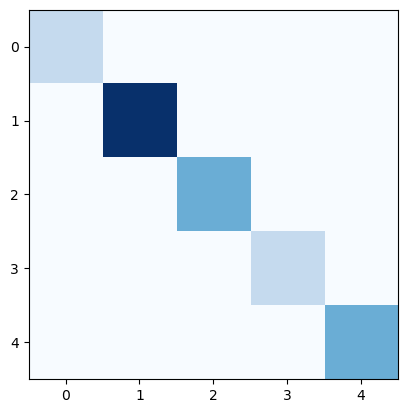

In [7]:
plt.imshow(D, cmap="Blues")

Adjacency matrix (Careful, `networkx` will yield a weighted adjacency matrix by default!)

In [8]:
A = nx.adjacency_matrix(N, weight=None).todense()

We can plot the matrix to get a visual overview of how interconnected is the network

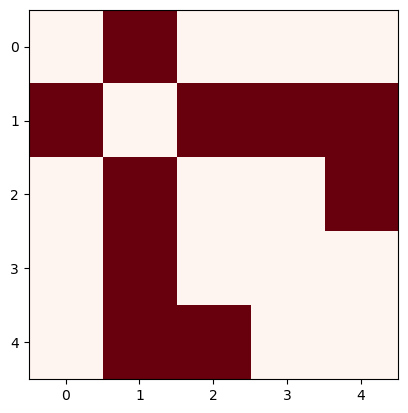

In [9]:
plt.imshow(A, cmap="Reds")

Incidence matrix (Careful, `networkx` will yield a incidence matrix without orientation by default!)

In [10]:
K=nx.incidence_matrix(N, oriented=True).todense()
K

array([[-1.,  0.,  0.,  0.,  0.],
       [ 1., -1., -1., -1.,  0.],
       [ 0.,  1.,  0.,  0., -1.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  1.]])

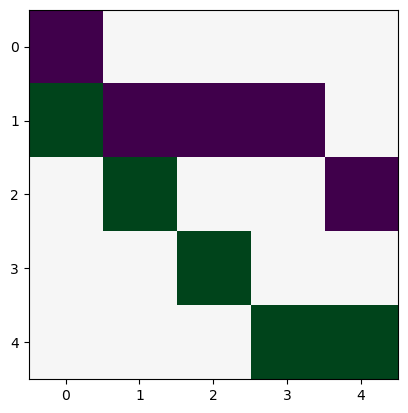

In [11]:
plt.imshow(K, cmap="PRGn")

Laplacian matrix (Careful, `networkx` will yield a weighted Laplacian matrix by default!)

In [12]:
L = nx.laplacian_matrix(N, weight=None).todense()
L

array([[ 1, -1,  0,  0,  0],
       [-1,  4, -1, -1, -1],
       [ 0, -1,  2,  0, -1],
       [ 0, -1,  0,  1,  0],
       [ 0, -1, -1,  0,  2]])

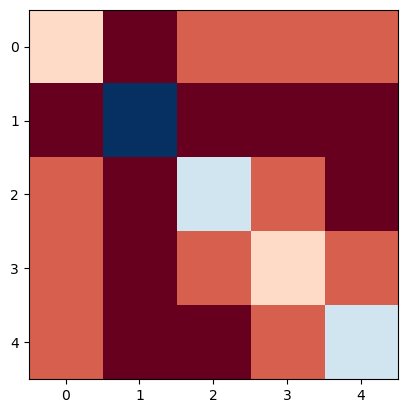

In [13]:
plt.imshow(L, cmap="RdBu")